In [36]:
# Load necessary module
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split

In [37]:
# Read Input Image
images = []

image = cv2.imread("Predict_Images/Uninfected.png")
image_from_array = Image.fromarray(image, "RGB")
size_image = image_from_array.resize((50, 50))
images.append(np.array(size_image))

<function matplotlib.pyplot.show(close=None, block=None)>

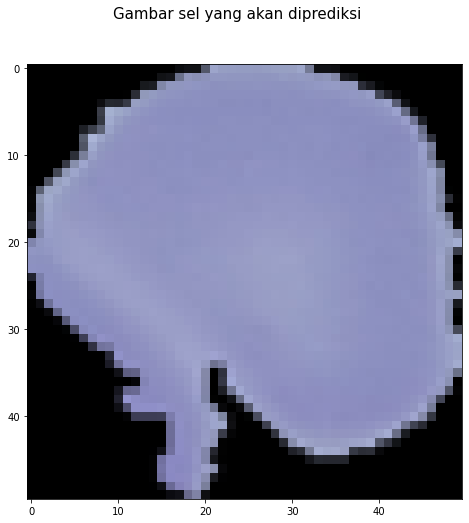

In [38]:
# Show Image
images = np.array(images)

fig = plt.figure(figsize=(8, 8))
fig.suptitle(f"Gambar sel yang akan diprediksi", fontsize=15, color="black")
plt.imshow(images[0])
plt.show

In [39]:
# Load Trained Model (Accuracy: 95.17%)
model = tf.keras.models.load_model('cell_classification_model')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
dropout_12 (Dropout)         (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
dropout_13 (Dropout)         (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)       

In [47]:
# Make Prediction (CNN Accuracy: 95.17%)
pred = np.argmax(model.predict(images), 1)
pred

array([0], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

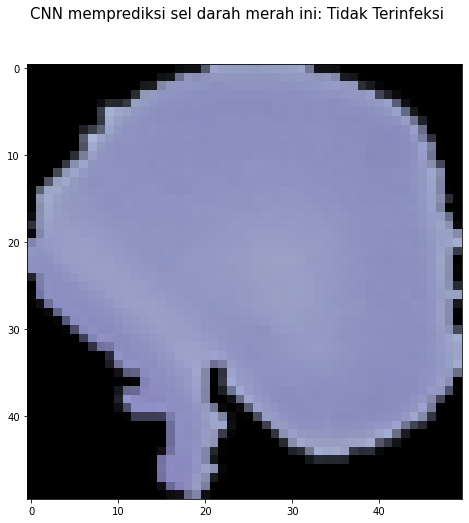

In [43]:
# Show Predicted Result
str_pred = ("Terinfeksi" if pred[0] == 1 else "Tidak Terinfeksi")
fig = plt.figure(figsize=(8, 8))
fig.suptitle(f"CNN memprediksi sel darah merah ini: {str_pred}", fontsize=15, color="black")
plt.imshow(images[0])
plt.show